In [108]:
import math

# RSSIの平均値をそれぞれ代入

RSSI_H1 = -66.04590818#-61.6507#-61.482 #フィルタリング #-65.9523 
RSSI_H2 = -48.18363273#-65.1996#-65.0848 #フィルタリング#-66.1331
RSSI_H3 = -52.54291417#-65.8383#-65.269 #フィルタリング#-64.3042


H1_m=round(abs(-(RSSI_H1)/(-17.41)+((-46.678)/(-17.41)))**math.e,3)*100
H2_m=round(abs(-(RSSI_H2)/(-19.96)+((-44.337)/(-19.96)))**math.e,3)*100
H3_m=round(abs(-(RSSI_H3)/(-23.39)+((-44.598)/(-23.39)))**math.e,3)*100

print(H1_m,H2_m,H3_m)

#ビーコンの座標データを入力
H1_x, H1_y = 735-100, 435
H2_x,H2_y = 735,435+100
H3_x, H3_y = 735+100*math.sin(math.radians(60)),435+100*math.sin(math.radians(60))


# the crossing points of two circles
def circles_cross_points(x1, y1, r1, x2, y2, r2):
    rr0 = (x2 - x1)**2 + (y2 - y1)**2
    xd = x2 - x1
    yd = y2 - y1
    rr1 = r1**2; rr2 = r2**2
    cv = (rr0 + rr1 - rr2)
    sv = (4*rr0*rr1 - cv**2)**.5
    return (
        (x1 + (cv*xd - sv*yd)/(2.*rr0), y1 + (cv*yd + sv*xd)/(2.*rr0)),
        (x1 + (cv*xd + sv*yd)/(2.*rr0), y1 + (cv*yd - sv*xd)/(2.*rr0)),
    )


p12_a, p12_b = circles_cross_points(H1_x, H1_y, H1_m, H2_x, H2_y, H2_m)
#print("(%.4f, %.4f) (%.4f, %.4f)" % (p12_a + p12_b))

#円の交点2つの内，3つ目のビーコンに近い座標を選択
distance_P12_a=(math.sqrt(((p12_a[0]-H3_x)**2)+(p12_a[1]-H3_y)**2))
distance_P12_b=(math.sqrt(((p12_b[0]-H3_x)**2)+(p12_b[1]-H3_y)**2))
if distance_P12_a < distance_P12_b:
    print(f"p12_a:{distance_P12_a}")
    i=0
else:
    print(f"p12_b:{distance_P12_b}")
    i=1

p23_a,p23_b = circles_cross_points(H2_x,H2_y,H2_m,H3_x,H3_y,H3_m)
#print("(%.4f, %.4f) (%.4f, %.4f)" % (p23_a + p23_b))


distance_P23_a=(math.sqrt(((p23_a[0]-H1_x)**2)+(p23_b[1]-H1_y)**2))
distance_P23_b=(math.sqrt(((p23_b[0]-H1_x)**2)+(p23_b[1]-H1_y)**2))
if distance_P23_a < distance_P23_b:
    print(f"p23_a:{distance_P23_a}")
else:
    print(f"p23_b:{distance_P23_b}")
    

p13_a, p13_b = circles_cross_points(H1_x,H1_y,H1_m,H3_x,H3_y,H3_m)
#print("(%.4f, %.4f) (%.4f, %.4f)" % (p13_a + p13_b))

distance_P13_a=(math.sqrt(((p13_a[0]-H3_x)**2)+(p13_a[1]-H3_y)**2))
distance_P13_b=(math.sqrt(((p13_a[0]-H3_x)**2)+(p13_b[1]-H3_y)**2))

if distance_P13_a > distance_P13_b:
    print(f"p13_a:{distance_P13_a}")
    i=0
else:
    print(f"p13_b:{distance_P13_b}")
    i=1

#ビーコンとの距離が近いほうを選択   
zahyou_X=(p12_b[0]+p23_b[0]+p13_b[0])/3
zahyou_Y=(p12_b[1]+p23_b[1]+p13_b[1])/3

print(f"RSSIから求めた受信デバイスの座標は({zahyou_X},{zahyou_Y})")

133.6 1.0999999999999999 5.3


TypeError: can't convert complex to float

In [109]:

    

#ビーコンH1,H2の距離

def zyusin(x1,y1,x2,y2):
    
    
    katamuki = -(y2-y1) / (x2-x1)

    b=katamuki*x1+y1

    #print(f"y={katamuki}x+{b}")

    
    #makeLinearEquation(x1,y1,x2,y2)

    distance_H3_H1=(math.sqrt(((x2-x1)**2)+(y2-y1)**2))
    #print(f"ビーコンH1とビーコンH3の距離は{round(distance_H3_H1,3)}cm")

    #print(f"ビーコンH1の距離は{H1_m}cm,ビーコンH3の距離は{H3_m}cm")

    #ビーコンの電波間の距離
    distance_denpa_H3_H1=abs(distance_H3_H1-H3_m-H1_m)
    #print(f"ビーコン電波間の距離は{round(distance_denpa_H3_H1,3)}cm")

    #青い点
    #print(f"青い点は電波の端から{round(distance_denpa_H3_H1/2,3)}cm")

    blue_distance=H1_m+round(distance_denpa_H3_H1/2,3)
    #print(f"ビーコンH1から青い点の距離は{round(blue_distance,3)}cm")

    hiritu1=distance_H3_H1/blue_distance
    #print(f"比率は{hiritu1}:1")
    H3_H1_ao=x1+(x2-x1)/hiritu1

    #print(H3_H1_ao)

    y=-katamuki*H3_H1_ao+b
    return (H3_H1_ao,y)

zyusin1=zyusin(H1_x,H1_y,H3_x,H3_y)

zyusin2=zyusin(H1_x,H1_y,H2_x,H2_y)

zyusin3=zyusin(H2_x,H2_y,H3_x,H3_y)

gra_x=(zyusin1[0]+zyusin2[0]+zyusin3[0])/3
gra_y=(zyusin1[1]+zyusin2[1]+zyusin3[1])/3

print(gra_x,gra_y)


803.0711546662948 515.4413260739283


実測地点の座標(715,415)
予測値点の座標(783,495)
715 515
765 502
100cm
100cm
100cm


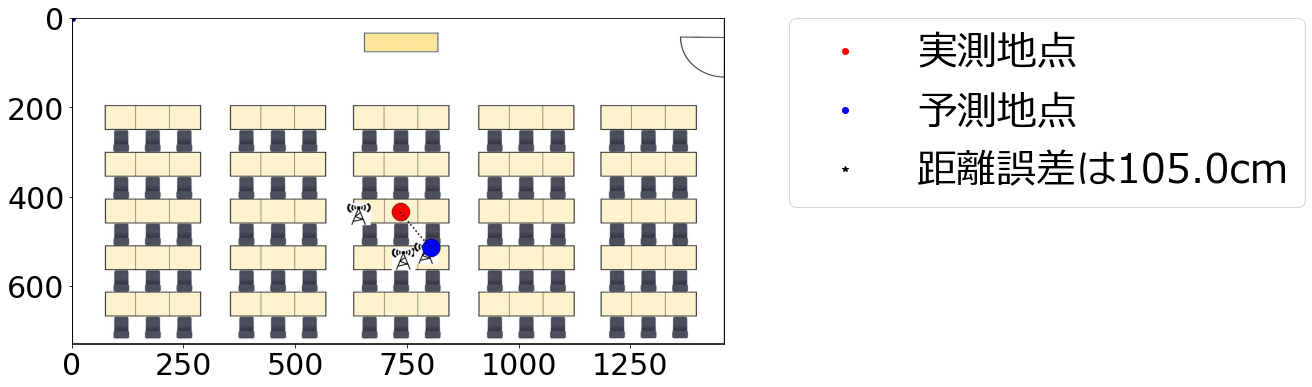

In [110]:
import matplotlib.pyplot as plt 
import numpy as np
from PIL import Image,ImageDraw
import cv2
import numpy as np
import math
from array import array
from matplotlib.collections import LineCollection

input_ = False

try:
    if(input_):
        x1,y1=(int(x) for x in input().split())
        x2,y2=(int(x) for x in input().split())
        Ax,Ay=(int(x) for x in input().split())
        Bx,By=(int(x) for x in input().split())
        Cx,Cy=(int(x) for x in input().split())
    else:
        x1,y1=(735,435)
        #x2,y2=(zahyou_X,zahyou_Y)
        x2,y2=(gra_x,gra_y)
        #インプットした座標を中心座標として計算する
        #X1,Y1=実測地点の座標
        X1=int((x1+x1-40)/2)
        Y1=int((y1+y1-40)/2)
        print(f"実測地点の座標({X1},{Y1})")
        #X2,Y2=予測値点の座標
        X2=int((x2+x2-40)/2)
        Y2=int((y2+y2-40)/2)
        
        print(f"予測値点の座標({X2},{Y2})")
        
        rad = math.radians(0)
        x = round(100 * math.cos(rad))
        y = round(100 * math.sin(rad))
        
        Ax,Ay=(X1-100, Y1)
        Bx,By=(X1,Y1+100)
        Cx,Cy=(round(X1+100*math.cos(math.radians(60))), round(Y1+100*math.sin(math.radians(60))))
         #735-100*math.sin(30),435+100*math.cos(30)
        #Ax,Ay=(X1-100,Y1)
        #Bx,By=(round(X1+100*math.cos(45)),round(Y1+100*math.sin(45)))
        #Cx,Cy=(X1,Y1+100)
        print(Bx,By)
        print(Cx,Cy)
    
    fig = plt.figure(figsize=(12,6))
    fig.patch.set_facecolor("white")
    ax = fig.add_subplot(1,1,1)
    im = Image.open("kouzitu207.jpg")
    fm = Image.open("beacon.png")
    #ビーコンの配置場所
    #目標デバイスから1mの場所にビーコンを配置する
     
    #ビーコンA
    im.paste(fm,(Ax,Ay))
    #ビーコンB 
    im.paste(fm,(Bx,By))
    #ビーコンC
    im.paste(fm,(Cx,Cy))

    draw=ImageDraw.Draw(im)
    #実際にデバイスを置いている点の座標(赤)
    draw.ellipse((X1,Y1,X1+40,Y1+40),fill=(255,0,0),outline=(0,0,0))
    #実測して計算した座標(青)
    draw.ellipse((X2,Y2,X2+40,Y2+40),fill=(0,0,255),outline=(0,0,0))
    ax.imshow(im)
    #線をプロット1
    plt.plot([x1,x2],[y1,y2],color="black",linestyle="dotted")

    #点と点の距離
    distance=round((math.sqrt(((X2-X1)**2)+(Y2-Y1)**2)),2)
    #print(f"距離誤差は{distance}cm")
   
    #ビーコンと実測地点の距離
    distance_A=round(math.sqrt(((Ax-X1)**2)+(Ay-Y1)**2))
    distance_B=round(math.sqrt(((Bx-X1)**2)+(By-Y1)**2))
    distance_C=round(math.sqrt(((Cx-X1)**2)+(Cy-Y1)**2))
    
    print(f"{distance_A}cm")
    print(f"{distance_B}cm")
    print(f"{distance_C}cm")
    
    #ビーコンのプロット
    plt.rcParams["font.size"] = 30
    plt.plot(0,0,"o",alpha=1,color="red",label="実測地点")
    plt.plot(0,0,"o",alpha=1,color="blue",label="予測地点")
    plt.plot(0,0,"*",color="black",label=f"距離誤差は{distance}cm")
    plt.legend(prop={"family":"Meiryo","size":40},bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0)
    

except ValueError as e:
    print("もう一度入力してください.")


715 415
100cm
100cm
100cm


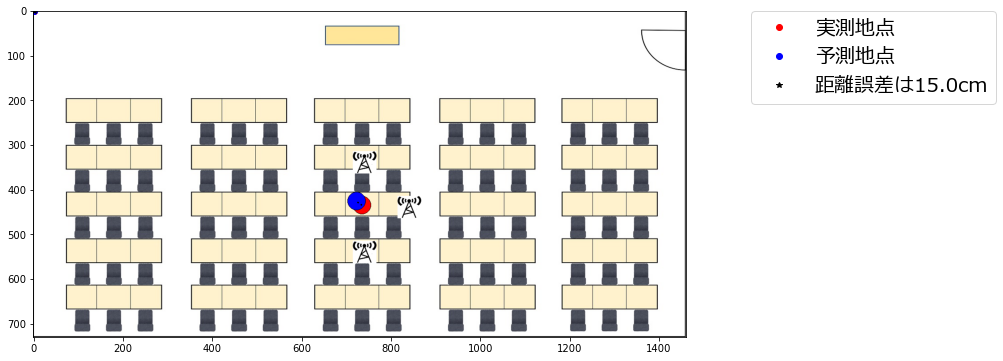

In [4]:
import matplotlib.pyplot as plt 
import numpy as np
from PIL import Image,ImageDraw
import cv2
import numpy as np
import math
from array import array
from matplotlib.collections import LineCollection

input_ = False



try:
    if(input_):
        x1,y1=(int(x) for x in input().split())
        x2,y2=(int(x) for x in input().split())
        Ax,Ay=(int(x) for x in input().split())
        Bx,By=(int(x) for x in input().split())
        Cx,Cy=(int(x) for x in input().split())
    else:
        x1,y1=(735,435)
        x2,y2=(beacon_x,beacon_y)
        #インプットした座標を中心座標として計算する
        #X1,Y1=実測地点の座標
        X1=int((x1+x1-40)/2)
        Y1=int((y1+y1-40)/2)
        print(X1,Y1)
        #X2,Y2=予測値点の座標
        X2=int((x2+x2-40)/2)
        Y2=int((y2+y2-40)/2)
        
        
        rad = math.radians(0)
        x = round(100 * math.cos(rad))
        y = round(100 * math.sin(rad))
        
        Ax,Ay=(X1,Y1+100)
        Bx,By=(X1+x,Y1-y)
        Cx,Cy=(X1,Y1-100)
        

    fig = plt.figure(figsize=(12,6))
    fig.patch.set_facecolor("white")
    ax = fig.add_subplot(1,1,1)
    im = Image.open("kouzitu207.jpg")
    fm = Image.open("beacon.png")
    #ビーコンの配置場所
    #目標デバイスから1mの場所にビーコンを配置する
    
    
    #ビーコンA
    im.paste(fm,(Ax,Ay))
    #ビーコンB 
    im.paste(fm,(Bx,By))
    #ビーコンC
    im.paste(fm,(Cx,Cy))


    draw=ImageDraw.Draw(im)
    #実際にデバイスを置いている点の座標(赤)
    draw.ellipse((X1,Y1,X1+40,Y1+40),fill=(255,0,0),outline=(0,0,0))
    #実測して計算した座標(青)
    draw.ellipse((X2,Y2,X2+40,Y2+40),fill=(0,0,255),outline=(0,0,0))
    ax.imshow(im)
    #線をプロット1
    plt.plot([x1,x2],[y1,y2],color="black",linestyle="dotted")

    #点と点の距離
    distance=(math.sqrt(((X2-X1)**2)+(Y2-Y1)**2))
    #print(f"距離誤差は{distance}cm")
   
    #ビーコンと実測地点の距離
    distance_A=round(math.sqrt(((Ax-X1)**2)+(Ay-Y1)**2))
    distance_B=round(math.sqrt(((Bx-X1)**2)+(By-Y1)**2))
    distance_C=round(math.sqrt(((Cx-X1)**2)+(Cy-Y1)**2))
    
    print(f"{distance_A}cm")
    print(f"{distance_B}cm")
    print(f"{distance_C}cm")
    
    #ビーコンのプロット
    plt.plot(0,0,"o",alpha=1,color="red",label="実測地点")
    plt.plot(0,0,"o",alpha=1,color="blue",label="予測地点")
    plt.plot(0,0,"*",color="black",label=f"距離誤差は{distance}cm")
    plt.legend(prop={"family":"Meiryo","size":20},bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0)
    

except ValueError as e:
    print("もう一度入力してください.")


In [32]:
import math 
a=100
b=100
A=30

print(a*math.cos(30),a*math.sin(30))

15.425144988758404 -98.80316240928619


10
